In [1]:
#importing libraries
import cv2
import numpy as np
from numpy.linalg import norm
from skimage.util import random_noise
from skimage.exposure import adjust_gamma
from skimage.transform import rotate
import matplotlib.pyplot as plt

In [2]:
#load image and min-max normalize
file_path="/home/cisir/codes/estcon/left.png"
image_raw=cv2.imread(file_path,0) #gray-scale
image_raw=image_raw/255.0
size=image_raw.shape[0]*image_raw.shape[1]

In [3]:
#Image manipulation using sklearn
sigma=[0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
angle=[0,20,40,60,80,100,120,140,160]
gam=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
def noise_rot_generator(i,sigma,angle,gam):
    img_noise=[]
    img_rot=[]
    img_gamma=[]
    for n in range(0,i+1):
        img_noise.append(random_noise(image_raw,mode='gaussian',var=sigma[n]**2))
        img_rot.append(rotate(image_raw,angle[n],mode='symmetric'))
        img_gamma.append(adjust_gamma(image_raw,gamma=gam[n]))
    return np.array(img_noise),np.array(img_rot),np.array(img_gamma)

In [4]:
#Image error metrics function,returns L1 and L2 norm of two images
def norm_calculator(images,size):
    l1=[]
    l2=[]
    for n in range(0,images.shape[0]):
        l1.append((norm(np.subtract(image_raw,images[n]),1))/size)
        l2.append((norm(np.subtract(image_raw,images[n])))/size)
    return np.array(l1),np.array(l2)

In [5]:
def plot_imgs(images,type_aug):
    plt.figure(figsize=(10,10))
    for n in range(0,images.shape[0]):
        ax=plt.subplot(3,3,n+1)
        plt.imshow(images[n],cmap=plt.cm.binary)
        if type_aug=='rot':
            plt.title('angle= {}'.format(angle[n]))
        else:
            plt.title('sigma= {}'.format(sigma[n]))

In [6]:
#image transformations
img_noise,img_rot,img_gamma=noise_rot_generator(8,sigma,angle,gam)

In [7]:
#calculating norms for different transformations
l1_noise,l2_noise=norm_calculator(img_noise,size)
l1_rot,l2_rot=norm_calculator(img_rot,size)
l1_gamma,l2_gamma=norm_calculator(img_gamma,size)

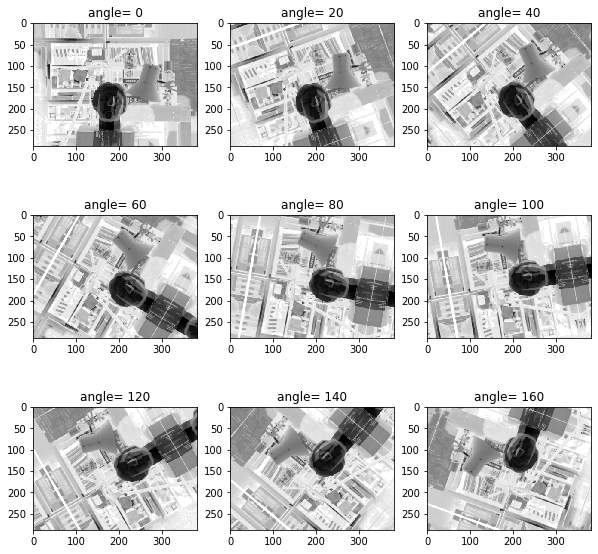

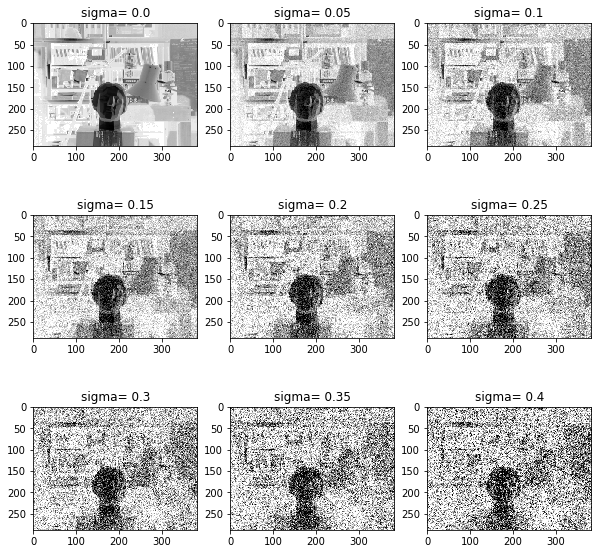

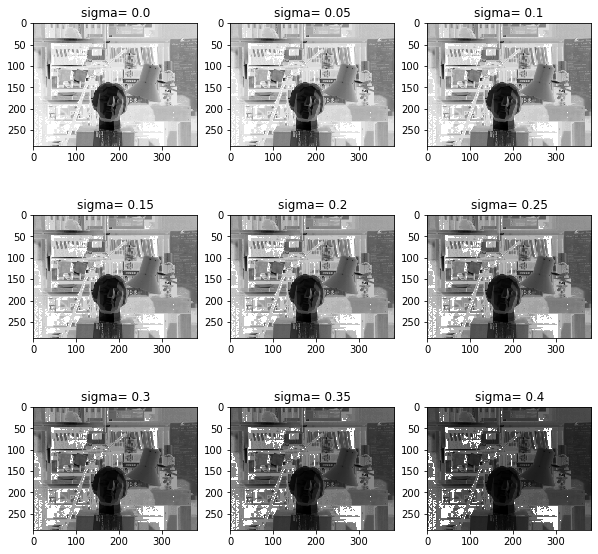

In [8]:
plot_imgs(img_rot,'rot')
plot_imgs(img_noise,'noise')
plot_imgs(img_gamma,'gamma')

<function matplotlib.pyplot.show(*args, **kw)>

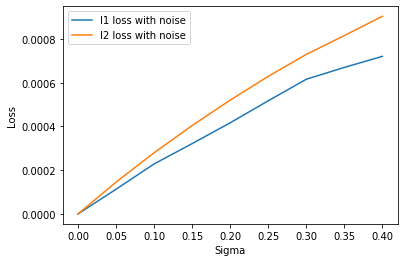

In [9]:
plt.plot(sigma,l1_noise,label='l1 loss with noise')
plt.plot(sigma,l2_noise,label='l2 loss with noise')
plt.legend(loc='upper left')
plt.xlabel('Sigma')
plt.ylabel('Loss')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

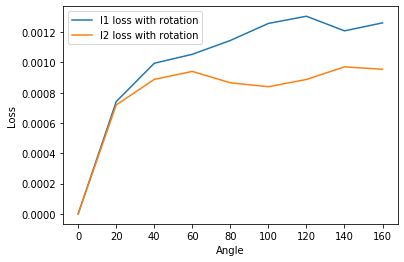

In [10]:
plt.plot(angle,l1_rot,label='l1 loss with rotation')
plt.plot(angle,l2_rot,label='l2 loss with rotation')
plt.legend(loc='upper left')
plt.xlabel('Angle')
plt.ylabel('Loss')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

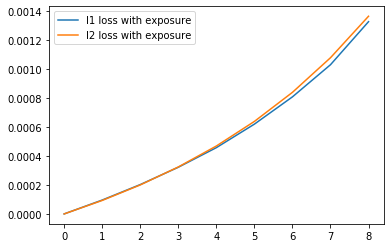

In [11]:
plt.plot(l1_gamma,label='l1 loss with exposure')
plt.plot(l2_gamma,label='l2 loss with exposure')
plt.legend(loc='upper left')
plt.show